In [33]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

In [2]:
%cd ../../PGGCN/

/home/ali/GBNN/PGGCN


In [12]:
PGCN_PG_hists = pickle.load(open('../Notebooks/Entropy/PGCN_K_fold_hists.pkl', 'rb'))
PGCN_PG_loss = pickle.load(open('../Notebooks/Entropy/PGCN_K_fold_test.pkl', 'rb'))
PGCN_DD_hists = pickle.load(open('PGCN_DD_K_fold_hists.pkl', 'rb'))
PGCN_DD_loss = pickle.load(open('PGCN_DD_K_fold_test.pkl', 'rb'))
PGNN_PG_hists = pickle.load(open('PGNN_PG_hists.pkl', 'rb'))
PGNN_PG_loss = pickle.load(open('PGNN_PG_loss.pkl', 'rb'))
PGNN_DD_hists = pickle.load(open('PGNN_DD_hists.pkl', 'rb'))
PGNN_DD_loss = pickle.load(open('PGNN_DD_loss.pkl', 'rb'))
Alles_hists = pickle.load(open('Alles_hists.pkl', 'rb'))
Alles_loss = pickle.load(open('Alles_loss.pkl', 'rb'))

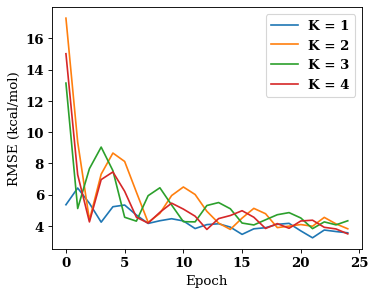

In [34]:
figure(figsize=(5, 4), dpi=80)
fig, axs = plt.subplots(2, 2)
for i in range(4):
    plt.plot(PGCN_PG_hists[i][:25], label='K = %d' % (i + 1))
plt.xlabel('Epoch')
plt.ylabel('RMSE (kcal/mol)')
plt.legend()